Ringing artifact because of distortion and loss of high freq component in image.
Gaussian low pass doesn't "remove" ringing. It doesn't cause ringing.
 
in the time domain, the cause is an impulse response that oscillates, assuming negative values. This can be resolved by using a filter whose impulse response is non-negative and does not oscillate, but shares desired traits. For example, for a low-pass filter, the Gaussian filter is non-negative and non-oscillatory, hence causes no ringing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**1.A**

In [ ]:
M=1001
N=1001
u=100
v=200
img=np.zeros(shape=(M,N))
for m in range(0  ,M):
  for n in range(0,N):
    temp=np.sin(2*np.pi*(u*m/M+v*n/N))
    img[m][n]=temp*255 #(0 if temp<=0 else temp )*255
plt.imshow(img,cmap='gray')

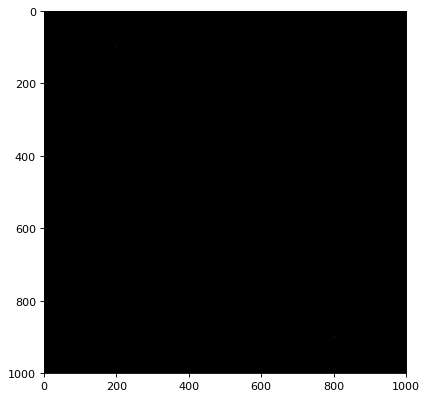

In [9]:
def DFT(img):
  img_fourier=np.fft.fft2(img)#np.fft.fftshift(np.fft.fft2(img))
  plt.figure(num=None, figsize=(8, 6), dpi=80)
  plt.imshow(np.log(1+abs(img_fourier)),cmap='gray')
  #print(img_fourier)
  
DFT(img)

**1.B**

In [ ]:
path='/content/drive/MyDrive/DIP/Assignment03'
img=plt.imread(path+'/input/characters.tif')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


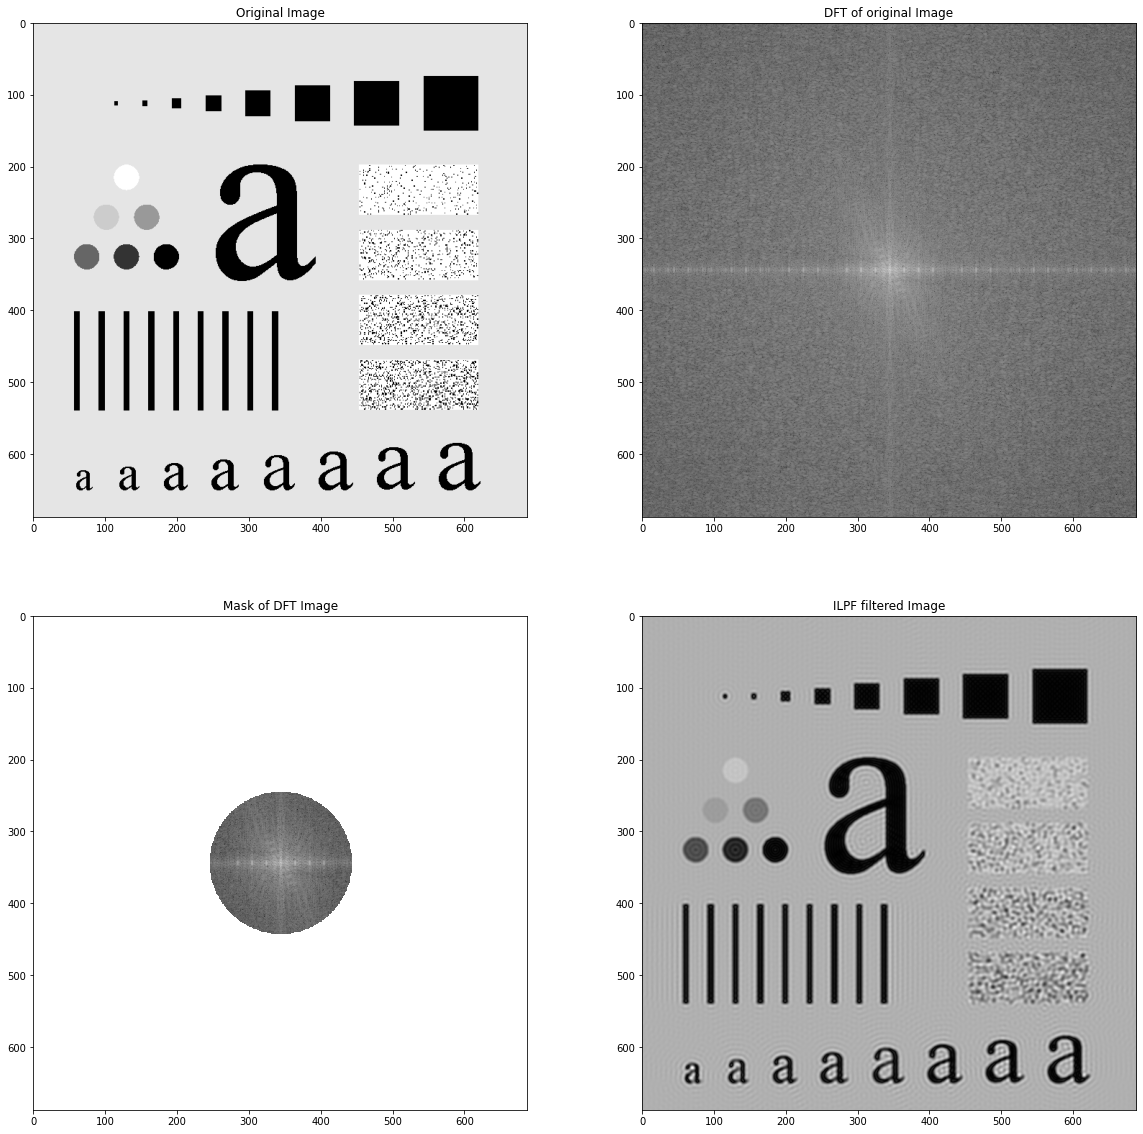

In [ ]:
def ILPF(f,D0):
  img_dft=np.fft.fftshift(np.fft.fft2(f))
  rows,cols=f.shape
  crow,ccol=int(rows/2),int(cols/2)

  mask=np.zeros((rows,cols),np.uint8)
  x,y=np.ogrid[:rows,:cols]
  mask_area=(x-crow)**2+(y-ccol)**2<=D0**2
  mask[mask_area]=1

  img_dft_lpf=img_dft*mask
  img_dft_lpf_mag_spec=np.log(abs(img_dft_lpf))#magnitude spectrum only plotting perspective
  f_hat=np.fft.ifft2(np.fft.ifftshift(img_dft_lpf))
  #plt.figure(num=None, figsize=(8, 6), dpi=80)
  #plt.imshow(img_dft_lpf_mag_spec, cmap='gray')
  return abs(f_hat),abs(img_dft),img_dft_lpf_mag_spec

def Q1B():
  img_hat,img_dft,img_dft_lpf_mag_spec=ILPF(img,100)
  plt.figure(figsize=(20,20))
  plt.subplot(2,2,4)
  plt.title('ILPF filtered Image')
  plt.imshow(img_hat, cmap='gray')
  plt.subplot(2,2,1)
  plt.title('Original Image')
  plt.imshow(img, cmap='gray')
  plt.subplot(2,2,2)
  plt.title('DFT of original Image')
  plt.imshow(np.log(img_dft), cmap='gray')
  plt.subplot(2,2,3)
  plt.title('Mask of DFT Image')
  plt.imshow(img_dft_lpf_mag_spec, cmap='gray')

Q1B()

**1.C**

In [ ]:
img=plt.imread(path+'/input/characters.tif')


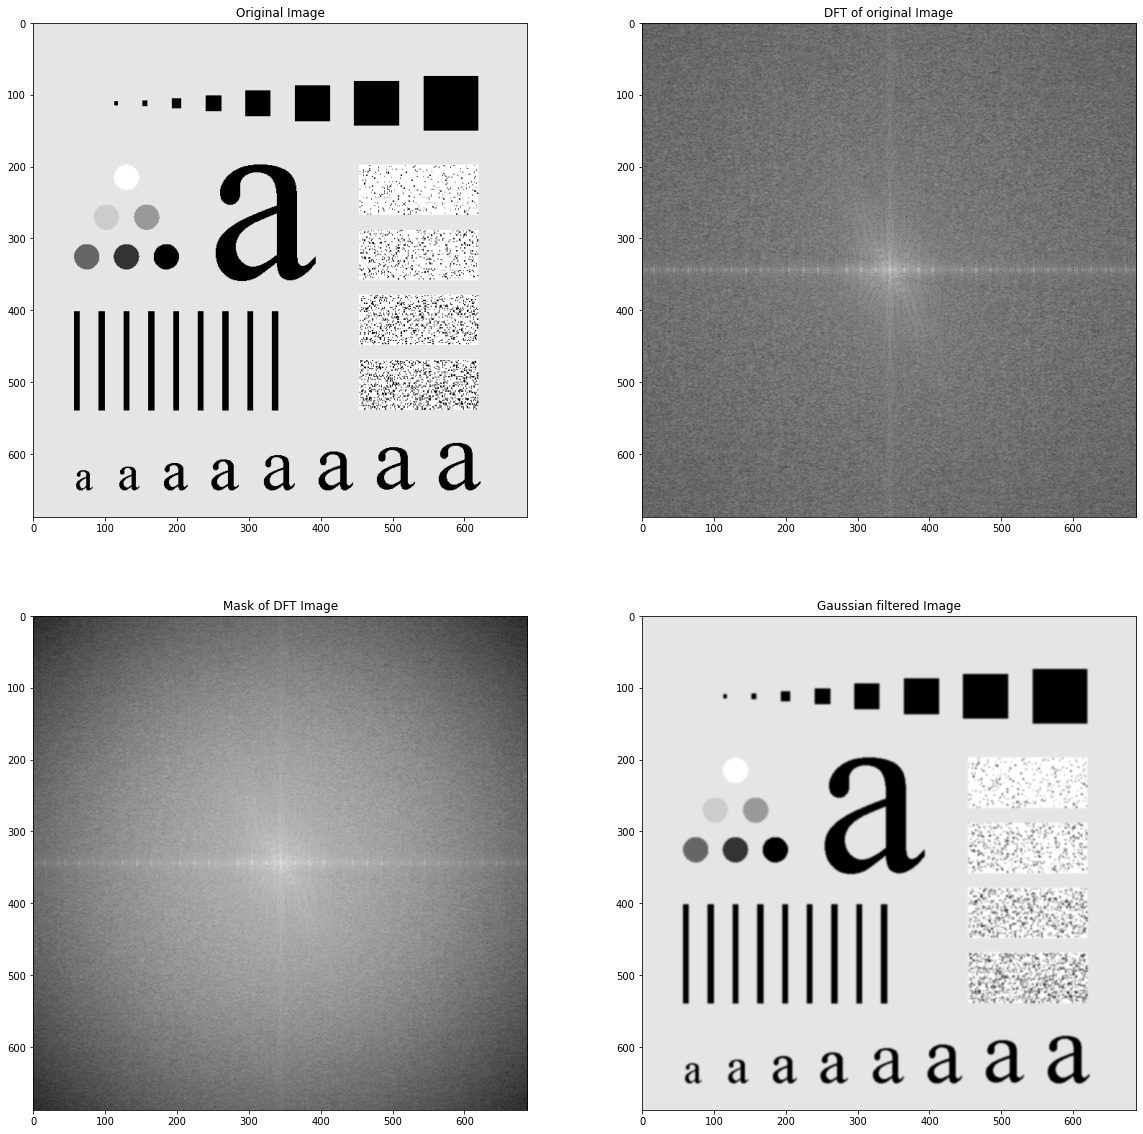

In [ ]:
def Gaussian_filter(f,D0):
  img_dft=np.fft.fftshift(np.fft.fft2(f))
  rows,cols=f.shape
  crow,ccol=int(rows/2),int(cols/2)

  mask=np.zeros((rows,cols),np.uint8)
  x,y=np.ogrid[:rows,:cols]
  mask=np.exp(-((x-crow)**2+(y-ccol)**2)/(2*D0**2))

  img_dft_lpf=img_dft*mask
  img_dft_lpf_mask=np.log(abs(img_dft_lpf))#magnitude spectrum only plotting perspective
  f_hat=np.fft.ifft2(np.fft.ifftshift(img_dft_lpf))
  #plt.figure(num=None, figsize=(8, 6), dpi=80)
  #plt.imshow(img_dft_lpf_mag_spec, cmap='gray')
  return abs(f_hat),abs(img_dft),img_dft_lpf_mask

def Q1C():
  img_hat,img_dft,img_dft_lpf_mask=Gaussian_filter(img,100)
  plt.figure(figsize=(20,20))
  plt.subplot(2,2,4)
  plt.title('Gaussian filtered Image')
  plt.imshow(img_hat, cmap='gray')
  plt.subplot(2,2,1)
  plt.title('Original Image')
  plt.imshow(img, cmap='gray')
  plt.subplot(2,2,2)
  plt.title('DFT of original Image')
  plt.imshow(np.log(img_dft), cmap='gray')
  plt.subplot(2,2,3)
  plt.title('Mask of DFT Image')
  plt.imshow(img_dft_lpf_mask, cmap='gray')

Q1C()